## GROUP 1 - NFL PREDICTOR

In [1]:
import numpy as np
import pandas as pd

In [2]:
scores = pd.read_csv('spreadspoke_scores.csv')
teams = pd.read_csv('nfl_teams.csv')
# stadiums = pd.read_csv('nfl_stadiums.csv')

In [3]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13232 non-null  object 
 1   schedule_season      13232 non-null  int64  
 2   schedule_week        13232 non-null  object 
 3   schedule_playoff     13232 non-null  bool   
 4   team_home            13232 non-null  object 
 5   score_home           13231 non-null  float64
 6   score_away           13231 non-null  float64
 7   team_away            13232 non-null  object 
 8   team_favorite_id     10753 non-null  object 
 9   spread_favorite      10753 non-null  float64
 10  over_under_line      10743 non-null  object 
 11  stadium              13232 non-null  object 
 12  stadium_neutral      13232 non-null  bool   
 13  weather_temperature  12189 non-null  float64
 14  weather_wind_mph     12172 non-null  float64
 15  weather_humidity     8441 non-null  

In [4]:
scores.sort_values(by='schedule_season', ascending=False, inplace=True)
scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
13231,2/13/2022,2021,Superbowl,True,Los Angeles Rams,NaN,NaN,Cincinnati Bengals,LAR,-4.0,48.5,SoFi Stadium,True,72.0,0.0,NaN,DOME
13044,10/24/2021,2021,7,False,Green Bay Packers,24.0,10.0,Washington Football Team,GB,-8.5,48,Lambeau Field,False,NaN,NaN,NaN,NaN
13038,10/17/2021,2021,6,False,Pittsburgh Steelers,23.0,20.0,Seattle Seahawks,PIT,-5.5,43,Heinz Field,False,NaN,NaN,NaN,NaN
13039,10/17/2021,2021,6,False,Washington Football Team,13.0,31.0,Kansas City Chiefs,KC,-6.5,54,FedEx Field,False,NaN,NaN,NaN,NaN
13040,10/18/2021,2021,6,False,Tennessee Titans,34.0,31.0,Buffalo Bills,BUF,-6.0,53.5,Nissan Stadium,False,NaN,NaN,NaN,NaN


In [5]:
scores.schedule_week.unique()

array(['Superbowl', '7', '6', '5', '8', '9', '10', '2', '1', '3', '4',
       '17', '16', '15', 'Wildcard', '18', 'Division', 'Conference', '12',
       '11', '14', '13', 'SuperBowl', 'WildCard'], dtype=object)

In [6]:
teams.info()
# teams

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   team_name                43 non-null     object
 1   team_name_short          43 non-null     object
 2   team_id                  43 non-null     object
 3   team_id_pfr              43 non-null     object
 4   team_conference          43 non-null     object
 5   team_division            34 non-null     object
 6   team_conference_pre2002  43 non-null     object
 7   team_division_pre2002    41 non-null     object
dtypes: object(8)
memory usage: 2.8+ KB


In [7]:
###
# CREATE OFFICIAL TEAMS COLLECTION
### 

invalid_teams_idx = teams[teams['team_division'].isna()].index
invalid_teams_idx = invalid_teams_idx.append(pd.Index([20,42]))
print(invalid_teams_idx)
teams.drop(index=invalid_teams_idx, inplace=True)
display(teams)
print(len(teams))

Int64Index([1, 2, 15, 22, 26, 30, 31, 38, 39, 20, 42], dtype='int64')


,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central
10,Dallas Cowboys,Cowboys,DAL,DAL,NFC,NFC East,NFC,NFC East
11,Denver Broncos,Broncos,DEN,DEN,AFC,AFC West,AFC,AFC West


32


In [8]:
scores.columns
['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail']

data = scores[['schedule_week', 'schedule_playoff','team_home', 'score_home', 'score_away', 'team_away']]
# data.info()

In [9]:
data[data['score_home'].isnull()]
# Special Case Superbowl 2021

,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away
13231,Superbowl,True,Los Angeles Rams,NaN,NaN,Cincinnati Bengals


## Preprocessing

In [10]:
display(data)
data.info()

,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away
13231,Superbowl,True,Los Angeles Rams,NaN,NaN,Cincinnati Bengals
13044,7,False,Green Bay Packers,24.0,10.0,Washington Football Team
13038,6,False,Pittsburgh Steelers,23.0,20.0,Seattle Seahawks
13039,6,False,Washington Football Team,13.0,31.0,Kansas City Chiefs
13040,6,False,Tennessee Titans,34.0,31.0,Buffalo Bills
...,...,...,...,...,...,...
114,12,False,Denver Broncos,3.0,17.0,Oakland Raiders
113,11,False,Cleveland Browns,14.0,3.0,Washington Redskins
112,10,False,Washington Redskins,30.0,31.0,Dallas Cowboys
111,11,False,San Diego Chargers,19.0,41.0,Oakland Raiders


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13232 entries, 13231 to 0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   schedule_week     13232 non-null  object 
 1   schedule_playoff  13232 non-null  bool   
 2   team_home         13232 non-null  object 
 3   score_home        13231 non-null  float64
 4   score_away        13231 non-null  float64
 5   team_away         13232 non-null  object 
dtypes: bool(1), float64(2), object(3)
memory usage: 633.2+ KB


In [11]:
# Remove rows without scores
data = data.dropna(subset=['score_home', 'score_away'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13231 entries, 13044 to 0
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   schedule_week     13231 non-null  object 
 1   schedule_playoff  13231 non-null  bool   
 2   team_home         13231 non-null  object 
 3   score_home        13231 non-null  float64
 4   score_away        13231 non-null  float64
 5   team_away         13231 non-null  object 
dtypes: bool(1), float64(2), object(3)
memory usage: 633.1+ KB


In [12]:
###
# FIX DUPLICATE LABELS IN SCHEDULE_WEEK
### 

data['schedule_week'] = data['schedule_week'].apply(lambda x: str(x).lower())
data['schedule_week'].unique()

array(['7', '6', '5', '8', '9', '10', '2', '1', '3', '4', '17', '16',
       '15', 'wildcard', '18', 'division', 'conference', '12', '11', '14',
       '13', 'superbowl'], dtype=object)

In [13]:
###
# REMOVE SCORES NOT IN THE OFFICIAL TEAM COLLECTION
### 

valid_teams = teams['team_name'].unique()
# len(valid_teams)

invalid_scores = data[(~data['team_home'].isin(valid_teams) | ~data['team_away'].isin(valid_teams))]
print(f'Total original scores: {len(data)}')
print(f'Total invalid scores: {len(invalid_scores)}')
data.drop(index=invalid_scores.index, inplace=True)
print(f'Total final scores: {len(data)}')

Total original scores: 13231
Total invalid scores: 2563
Total final scores: 10668


In [14]:
# Label encoding for team names and schedule week
from sklearn.preprocessing import LabelEncoder

# Keep original data
prep_data = []
prep_data = data.copy()

# team_label_encoder = LabelEncoder()
# schedule_encoder = LabelEncoder()

# # build a set with all the teams
# teams = {}
# teams = set(prep_data['team_home'].unique())
# teams.update(set(prep_data['team_away'].unique()))

# # Encondign Teams
# team_label_encoder.fit(list(teams))
# prep_data['team_home'] = team_label_encoder.transform(prep_data['team_home'])
# prep_data['team_away'] = team_label_encoder.transform(prep_data['team_away'])

# # Encoding Schedule
# schedule_encoder.fit(prep_data['schedule_week'])
# prep_data['schedule_week'] = schedule_encoder.transform(prep_data['schedule_week'])


# display(prep_data)
# print(schedule_encoder.classes_)
# x = schedule_encoder.inverse_transform([0,2,19,20])
# x

In [15]:
# Create label
def create_label(row):
    if row['score_home'] != None and row['score_away'] != None:
        if row['score_home'] > row['score_away']:
            return 1
        else:
            return 0

prep_data['label'] = prep_data.apply(lambda x: create_label(x), axis=1)
prep_data.drop(['score_home','score_away'], inplace= True, axis=1)

# Codify schedule play off
def code_schedule_playoff(row):
    if row['schedule_playoff'] == True:
        return 1
    else:
        return 0

prep_data['playoff'] = prep_data.apply(lambda x: code_schedule_playoff(x), axis=1)
prep_data.drop(['schedule_playoff'], inplace= True, axis=1)    
display(prep_data)
print(prep_data.playoff.value_counts())
print(prep_data.columns)      

,schedule_week,team_home,team_away,label,playoff
13038,6,Pittsburgh Steelers,Seattle Seahawks,1,0
13040,6,Tennessee Titans,Buffalo Bills,1,0
13041,7,Cleveland Browns,Denver Broncos,1,0
13042,7,Arizona Cardinals,Houston Texans,1,0
13043,7,Baltimore Ravens,Cincinnati Bengals,0,0
...,...,...,...,...,...
116,11,Green Bay Packers,Chicago Bears,1,0
114,12,Denver Broncos,Oakland Raiders,0,0
113,11,Cleveland Browns,Washington Redskins,1,0
112,10,Washington Redskins,Dallas Cowboys,0,0


0    10201
1      467
Name: playoff, dtype: int64
Index(['schedule_week', 'team_home', 'team_away', 'label', 'playoff'], dtype='object')


In [16]:
categoricals = ['schedule_week', 'team_home', 'team_away']
dummy_cats = pd.get_dummies(prep_data[categoricals])
# display(dummy_cats)

prep_data = pd.concat([prep_data, dummy_cats], axis=1)
prep_data.drop(categoricals, axis=1, inplace= True)

## Modeling

In [17]:
# Split data
y = prep_data['label']
X = prep_data.drop(['label'], axis=1)
print(len(X.columns))
X.columns

87


Index(['playoff', 'schedule_week_1', 'schedule_week_10', 'schedule_week_11',
       'schedule_week_12', 'schedule_week_13', 'schedule_week_14',
       'schedule_week_15', 'schedule_week_16', 'schedule_week_17',
       'schedule_week_18', 'schedule_week_2', 'schedule_week_3',
       'schedule_week_4', 'schedule_week_5', 'schedule_week_6',
       'schedule_week_7', 'schedule_week_8', 'schedule_week_9',
       'schedule_week_conference', 'schedule_week_division',
       'schedule_week_superbowl', 'schedule_week_wildcard',
       'team_home_Arizona Cardinals', 'team_home_Atlanta Falcons',
       'team_home_Baltimore Ravens', 'team_home_Buffalo Bills',
       'team_home_Carolina Panthers', 'team_home_Chicago Bears',
       'team_home_Cincinnati Bengals', 'team_home_Cleveland Browns',
       'team_home_Dallas Cowboys', 'team_home_Denver Broncos',
       'team_home_Detroit Lions', 'team_home_Green Bay Packers',
       'team_home_Houston Texans', 'team_home_Indianapolis Colts',
       'team_ho

https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [18]:
# Split data train test data 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30113331, shuffle=True)

In [19]:
X_train.shape[1]

87

In [20]:
''' Build Architecture of ANN '''
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from keras.callbacks import ModelCheckpoint

model = tf.keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.5),
#     layers.Dense(50, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               8800      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 8,901
Trainable params: 8,901
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer= 'adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

filepath="checkpoints/weights-checkpoint-{epoch:02d}-{accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', mode='max',
                             verbose=1, save_best_only=True, save_weights_only=True )
callbacks_list = [checkpoint]

# Fit the model
# model_history = model.fit(X_train, y_train, epochs=50, callbacks=callbacks_list, verbose=2)
# model_score = model.evaluate(X_test, y_test)

# Whole dataset
model_history = model.fit(X_train, y_train, epochs=50, callbacks=callbacks_list, validation_split=0.2, verbose=2)
model_score = model.evaluate(X_test, y_test)

Epoch 1/50
214/214 - 1s - loss: 0.6770 - accuracy: 0.5759 - val_loss: 0.6856 - val_accuracy: 0.5612

Epoch 00001: accuracy improved from -inf to 0.57595, saving model to checkpoints\weights-checkpoint-01-0.5759.hdf5
Epoch 2/50
214/214 - 0s - loss: 0.6633 - accuracy: 0.5965 - val_loss: 0.6807 - val_accuracy: 0.5565

Epoch 00002: accuracy improved from 0.57595 to 0.59646, saving model to checkpoints\weights-checkpoint-02-0.5965.hdf5
Epoch 3/50
214/214 - 0s - loss: 0.6565 - accuracy: 0.6112 - val_loss: 0.6854 - val_accuracy: 0.5565

Epoch 00003: accuracy improved from 0.59646 to 0.61125, saving model to checkpoints\weights-checkpoint-03-0.6112.hdf5
Epoch 4/50
214/214 - 0s - loss: 0.6519 - accuracy: 0.6209 - val_loss: 0.6856 - val_accuracy: 0.5624

Epoch 00004: accuracy improved from 0.61125 to 0.62092, saving model to checkpoints\weights-checkpoint-04-0.6209.hdf5
Epoch 5/50
214/214 - 0s - loss: 0.6470 - accuracy: 0.6277 - val_loss: 0.6836 - val_accuracy: 0.5653

Epoch 00005: accuracy impr


Epoch 00039: accuracy improved from 0.77369 to 0.77516, saving model to checkpoints\weights-checkpoint-39-0.7752.hdf5
Epoch 40/50
214/214 - 0s - loss: 0.4626 - accuracy: 0.7769 - val_loss: 0.8436 - val_accuracy: 0.5466

Epoch 00040: accuracy improved from 0.77516 to 0.77692, saving model to checkpoints\weights-checkpoint-40-0.7769.hdf5
Epoch 41/50
214/214 - 0s - loss: 0.4597 - accuracy: 0.7823 - val_loss: 0.8462 - val_accuracy: 0.5466

Epoch 00041: accuracy improved from 0.77692 to 0.78233, saving model to checkpoints\weights-checkpoint-41-0.7823.hdf5
Epoch 42/50
214/214 - 0s - loss: 0.4584 - accuracy: 0.7775 - val_loss: 0.8532 - val_accuracy: 0.5542

Epoch 00042: accuracy did not improve from 0.78233
Epoch 43/50
214/214 - 0s - loss: 0.4549 - accuracy: 0.7779 - val_loss: 0.8618 - val_accuracy: 0.5554

Epoch 00043: accuracy did not improve from 0.78233
Epoch 44/50
214/214 - 0s - loss: 0.4521 - accuracy: 0.7837 - val_loss: 0.8636 - val_accuracy: 0.5483

Epoch 00044: accuracy improved fr

## Plot ephoc's scores and save model to disk

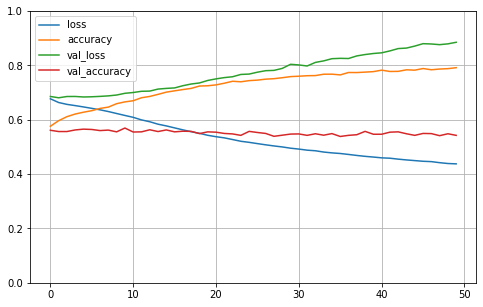

INFO:tensorflow:Assets written to: ./nfl_predictor.model\assets


In [22]:
# Plot Loss Score and Accuracy
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Save model
model.save('./nfl_predictor.model')

## Load model and weights from disk for prediction

In [23]:
# checkpoints\weights-checkpoint-49-0.7785.hdf5
# nfl_predictor.model

# nfl_predictor_model = keras.models.load_model('nfl_predictor.model')
# model.load_weights('weights_best.hdf5')
# model.compile(loss='binary_crossentropy', optimizer='adam')

# x_sample = X.iloc[11].copy()
# y_sample = y[11]
# print(x_sample)
# print(y_sample)
# print(x_sample.shape[0])

# x_sample = x_sample.values.reshape(1,x_sample.shape[0])
# y_predict = nfl_predictor_model.predict(x_sample)
# print(1 if y_predict > 0.5 else 0)